In [ ]:
!unzip /content/Faces.zip

In [27]:
import os
from tqdm import tqdm
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA

# Preparación de los datos

In [3]:
suffix = '.pgm'

all_files = os.listdir('/content/Faces')
pgm_files = [filename for filename in all_files if filename.endswith(suffix)]

In [5]:
faces = []
for filename in tqdm(pgm_files):
  path = '/content/Faces/' + filename
  with open(path, 'rb') as pgmf:
      image = plt.imread(pgmf)
  faces.append(image)

100%|██████████| 12833/12833 [00:01<00:00, 8926.82it/s]


In [6]:
faces = np.array(faces)
faces.shape

(12833, 64, 64)

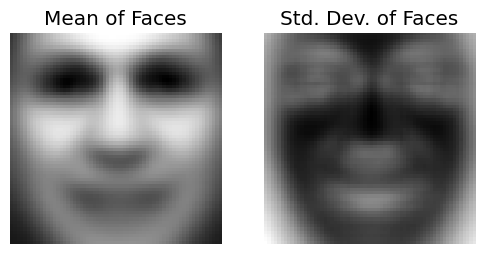

In [17]:
# Calculamos la imagen promedio y la desviación estándar para cada dígito
mean_images = np.mean(faces, axis=0)
std_images = np.std(faces, axis=0)

# Visualizamos las imágenes promedio y las desviaciones estándar
fig, axs = plt.subplots(1, 2, figsize=(6, 6))

axs[0].imshow(mean_images, cmap='gray')
axs[0].set_title(f"Mean of Faces")
axs[0].axis('off')

axs[1].imshow(std_images, cmap='gray')
axs[1].set_title(f"Std. Dev. of Faces")
axs[1].axis('off')

plt.show()

# PCA

In [8]:
X = np.array([im.flatten() for im in tqdm(faces, desc='Construyendo X')])


Construyendo X: 100%|██████████| 12833/12833 [00:00<00:00, 381438.17it/s]


In [9]:
X.shape

(12833, 4096)

In [59]:
# PCA
pca = PCA(n_components=200, whiten=False).fit(X)

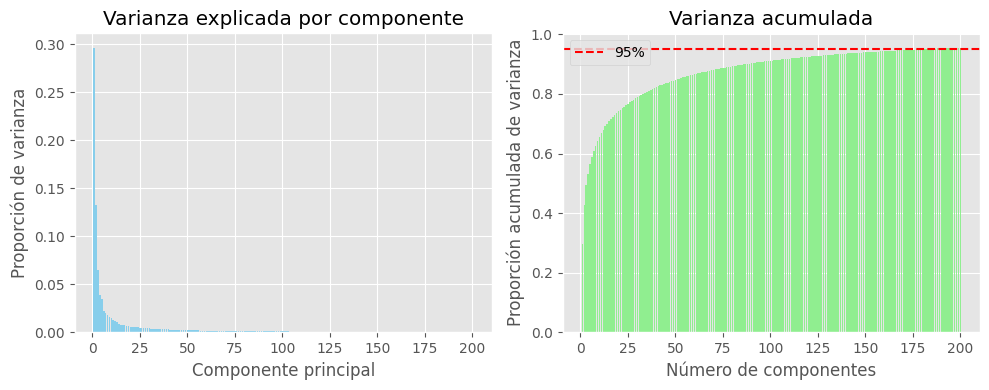

In [60]:
# Obtener varianzas
var_explicada = pca.explained_variance_ratio_
var_acumulada = np.cumsum(var_explicada)

# Gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Varianza explicada
ax1.bar(range(1, len(var_explicada)+1), var_explicada, color='skyblue')
ax1.set_title('Varianza explicada por componente')
ax1.set_xlabel('Componente principal')
ax1.set_ylabel('Proporción de varianza')
ax1.grid(True)

# Varianza acumulada
ax2.bar(range(1, len(var_acumulada)+1), var_acumulada, color='lightgreen')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95%')
ax2.set_title('Varianza acumulada')
ax2.set_xlabel('Número de componentes')
ax2.set_ylabel('Proporción acumulada de varianza')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Visualización

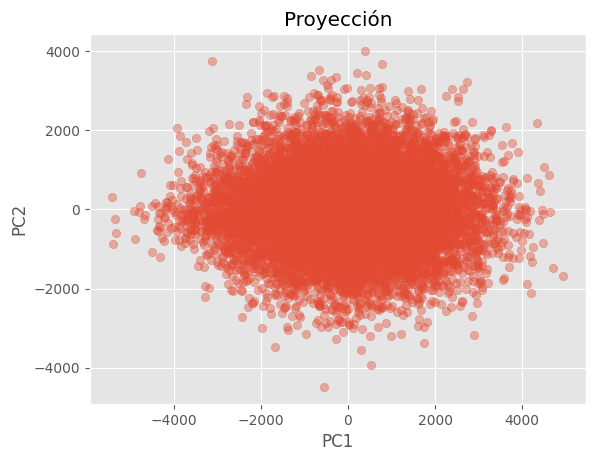

In [61]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.4)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección')
plt.show()

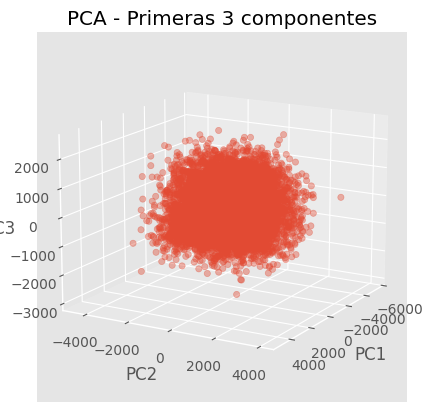

In [62]:
# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], alpha=0.4)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=15, azim=30)

ax.set_title('PCA - Primeras 3 componentes')
plt.show()

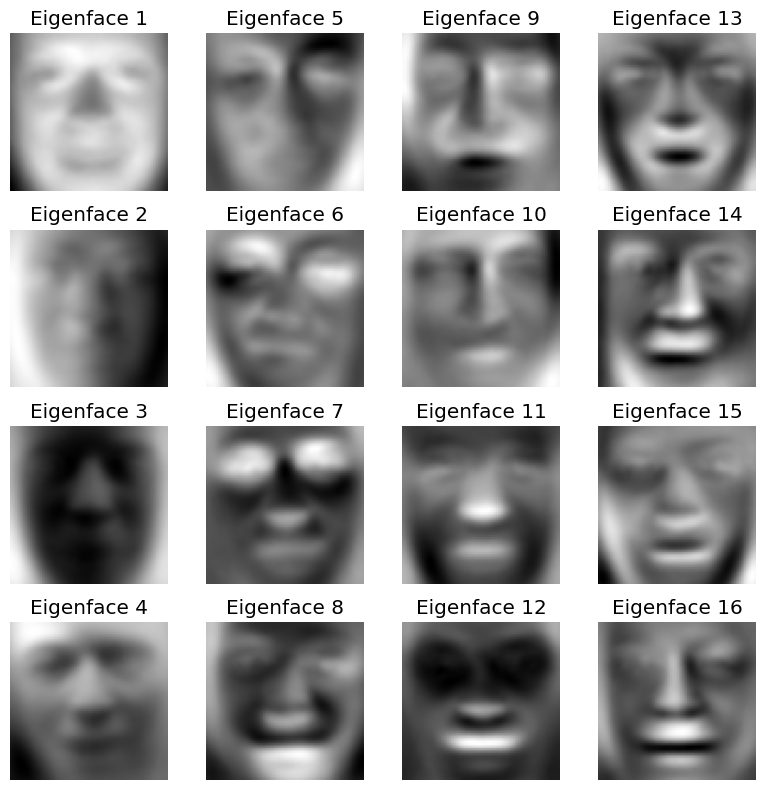

In [63]:
# Primeras K eigenfaces
K = 16
eigenfaces = pca.components_[:K]
faceshape = faces[0].shape
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,8))
for i in range(K):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
    axes[i%4][i//4].set_title(f"Eigenface {i+1}")
    axes[i%4][i//4].axis('off')

plt.tight_layout()
plt.show()

In [64]:
df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
0,-1200.070713,-603.052810,728.730529,642.642699,-741.435129,17.233483,-445.971895,-492.675484,-206.568679,-39.579532,...,-25.266504,40.447870,-78.393551,-29.101641,-40.417023,36.163537,40.009461,30.256368,6.003274,78.230961
1,-389.090635,691.653661,-218.428709,-461.766680,449.141283,91.659447,-170.554496,323.785597,287.744006,-236.247018,...,19.103385,13.605004,-0.701965,75.626695,-17.026964,-37.435646,7.719848,-18.799014,-1.070921,4.218159
2,990.662351,-360.326481,211.812190,336.296660,129.381238,-418.567115,-26.980109,85.531480,-120.174019,12.801769,...,19.929022,-66.583889,49.843233,50.627809,-18.728645,85.439603,-10.811825,7.732805,41.000098,104.786743
3,2152.501753,-143.214684,-337.461229,-509.482442,-14.030347,-376.006977,-765.957024,-60.825935,-545.446441,-64.071157,...,-11.711490,18.045127,28.171456,-13.326506,21.775032,-36.203645,-45.748263,50.707163,-19.553098,38.593567
4,1878.043220,-1417.991372,86.006819,-321.722012,-228.430258,421.905740,-438.786618,-649.947870,-334.832838,52.298293,...,7.619208,24.931806,39.922225,54.734111,28.796613,18.716782,-14.586924,-72.125000,25.123004,-20.384132


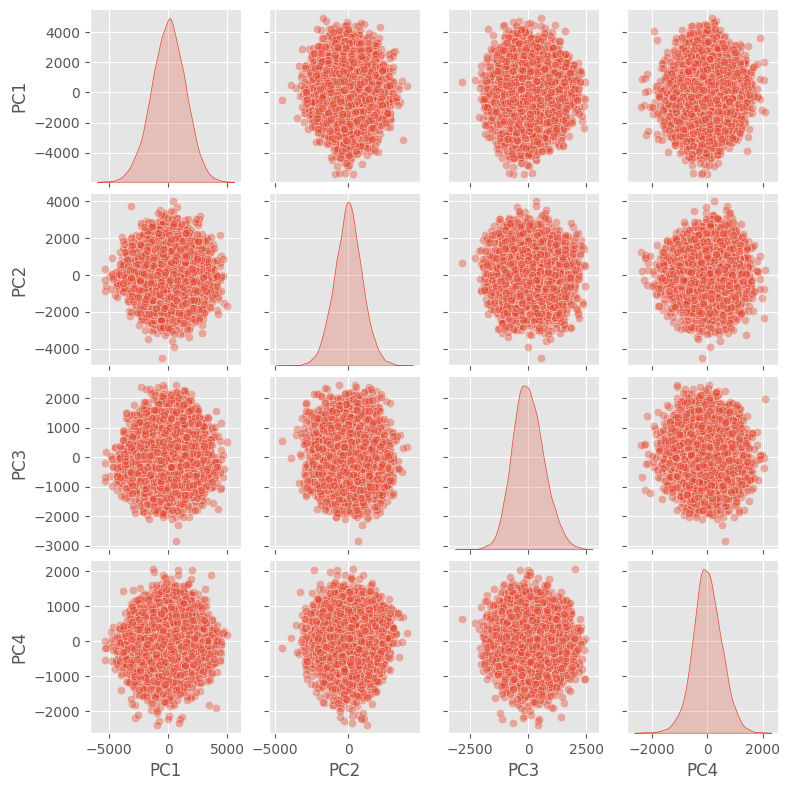

In [65]:
sns.pairplot(df[['PC1','PC2','PC3','PC4']], diag_kind='kde',height=2,plot_kws={'alpha':0.4})
plt.show()

# Reconstrucción

In [88]:
idx = 2050  # Índice de la imagen a reconstruir
original = X[idx]
pc_scores = X_pca[idx]

In [89]:
reconstructed_images = []
components_used = [10, 50, 100, 200]

for k in components_used:
    reconstruction = np.dot(pc_scores[:k], pca.components_[:k]) + pca.mean_
    reconstructed_images.append(reconstruction.reshape(faceshape))

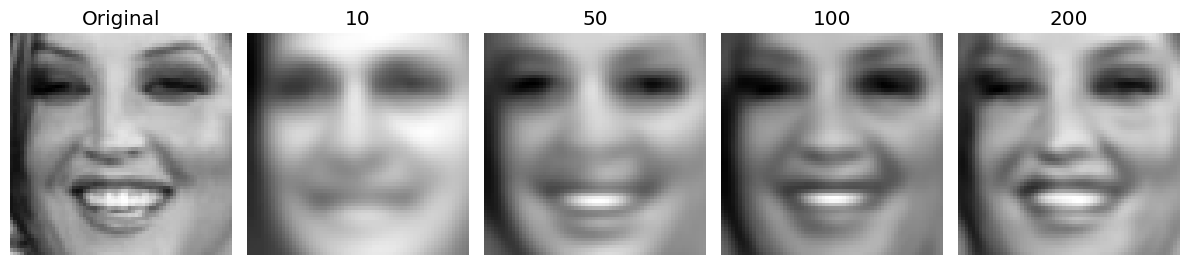

In [90]:
# Visualización
fig, axes = plt.subplots(1, len(components_used) + 1, figsize=(12, 4))

# Imagen original
axes[0].imshow(original.reshape(faceshape), cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Reconstrucciones
for i, img in enumerate(reconstructed_images):
    axes[i+1].imshow(img, cmap='gray')
    axes[i+1].set_title(f"{components_used[i]}")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()